<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/7_Complex_Systems/MC_Segregation_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simplest Schelling's model of segregation




Agent-based model used to analyze how individual and discriminatory actions could lead to global seggregated patterns in populations [1].

Consider a population of individuals, where each one belongs to either one of two groups $a$ and $b$. Each agent lives in a specific place in the world, but assume that each individual has some higher level of affinity to those that belong to its own group, i.e. $a$ members prefer to be surrounded by other $a$ members and likewise for the $b$ group. 

In that sense, suppose that each agent $i$ has $M$ close neighbours, what would happen to the community in general if every $i$ decide to move out to another random location in the world whenever it finds that the majority of its neighbors belong to the contrary faction?

For simplicity, for this notebook we will consider an irregular space, where agents can take any posituion $(x,y)$ with $x, y \in [0,1]$, though originally it was applied to a regular grid of points [1].


*[1] Schelling, T.C., 1971. Dynamic models of segregation. Journal of Mathematical Sociology, 1, 143–186.*

### Imports

In [ ]:
import matplotlib.style as mpst
mpst.use('classic')
from matplotlib import pyplot as plt
import numpy as np
from time import time, sleep
from IPython import display

### Define the Agents

Using a class, define which properties and which methods would each of the agents in the simulation have. 

For this particular case, we will consider that wach agent will have the following intrinsec properties:

- A position in the 2-D world $(x, y)$
- A group $G$.

And the following methods (actions):

- move_out: An action that will change the current position of the particle and place it in some other random location of the world.

- find_comfiness: This method will calculate how "happy" this agent is, given its neighborhood. For that matter, we will observe the 'num_nnbs' closest neighbors and check which group they belong to. If the number of affine agents is greater than some tolerance value, then the agent is "happy", otherwise, it isn't and therefore he will move out to another location.


In [ ]:
class SomePerson():
    """
    Class that describes the properties and methods that describe an agent.
    Each agent will have a position (x, y) in the plane, as well as a social group.
    """
    def __init__( self, social_group, x, y ):
        self.social_group = social_group
        self.x = x
        self.y = y
        
    def move_out( self ):
        self.x = np.random.rand( )
        self.y = np.random.rand( )
        
    def find_comfiness( self, all_people, my_index, num_nnbs, tolerance_num ):
        neighbors = all_people.copy()
        neighbors.pop( my_index )
        distances = np.linalg.norm( 
                        np.array( [ self.x, self.y ] ) \
                        - np.array( [ [each_nb.x, each_nb.y] for each_nb in neighbors ] ),
                        axis = 1 )

        neighbors = np.array(neighbors)
        closest_nbs = neighbors[ np.argsort(distances) ][ : num_nnbs ]
        
        closest_parties = np.array([ some_nb.social_group for some_nb in closest_nbs ])
        
        happy_level = np.sum( closest_parties == self.social_group )

        return happy_level >= tolerance_num

### Define the simulation logic

For this particular case, the simulation logic goes as follows:

1. Given an array of all the agents in the world, check the comfiness / happiness of each one of them. 
2. For those agents that are not happy with their neighborhood, apply the move_out method.
3. Repeat steps 1 and 2 until the whole population is "happy" or you reach a maximum number of iterations.

In [ ]:
def run_schelling_simulation( num_iters, all_people, num_nnbs, tolerance_num, colors_dict, to_plot ):
    t1 = time()
    avg_happy = []
    t = 0
    moved = 1
    while (t < num_iters) and ( moved == 1 ):
        ids_2_move = [ ]

        for i in range( N ):
            is_happy = all_people[ i ].find_comfiness(all_people, i, num_nnbs, tolerance_num)

            if not is_happy:
                ids_2_move.append( i )

        for k in ids_2_move:
            all_people[ k ].move_out( )

        if len( ids_2_move ) > 0:
            moved = 1
        else:
            moved = 0

        avg_happy.append( (N - len(ids_2_move))/N )

        if to_plot:
            plot_city( all_people, colors_dict )
            display.clear_output(wait=True)
            display.display(plt.gcf())
            sleep(1)
        t = t + 1
    t2 = time()

    print('Simulation took: ', t2-t1, ' seconds.')
    
    if to_plot:
        plt.close()
        plot_city( all_people, colors_dict )
    
    
    return all_people, avg_happy
    

### Drawing functions

In [ ]:
def plot_city( all_people, colors_dict ):
    """Plots the whole population
    all_people: <List> All agents in array 
    """
    all_xs = [ each_person.x for each_person in all_people]
    all_ys = [ each_person.y for each_person in all_people]
    all_groups = [ each_person.social_group for each_person in all_people]
    all_colors = [ colors_dict[ dis_group ] for dis_group in all_groups ]
    
    plt.figure(figsize = (4,4) )
    plt.scatter( all_xs, all_ys, c = all_colors, s = 100 )
    plt.xlim([ 0, 1])
    plt.ylim([ 0, 1])
    plt.xlabel('x')
    plt.xlabel('y')
    plt.grid()
    
def plot_historic_happiness(avg_happy):
    """Plots the comfiness level of the population each time step of the simulation.
    avg_happy: List of happiness values
    """
    plt.figure( figsize = (6,4) )
    plt.plot( avg_happy, ms = 10, marker = '.',
             linewidth = 2, color = 'purple', label = 'Overall Comfiness' )
    plt.legend( loc=4 )
    plt.grid()
    
def plot_errorbars( all_results ):
    max_result_size = np.max([len(a_list) for a_list in all_results])

    clean_results = np.array([np.pad( np.array(res_vec), (0, max_result_size - len( res_vec ) ),
           mode = 'constant', constant_values = 1 ) for res_vec in all_results])

    plt.figure( figsize = (6,4) )
    plt.errorbar( np.arange(0, max_result_size), np.mean( clean_results, axis = 0 ),
                 yerr = np.std( clean_results, axis = 0 ),
                linewidth = 1.5, ms = 3, marker = 'd',
                 color = 'darkgreen', label = 'Overall Comfiness')
    plt.ylim(top=1)
    plt.legend(loc=4)
    plt.grid()
    
def plot_errorbars_multiparam( ax, all_results, param_val, param_name ):
    max_result_size = np.max([len(a_list) for a_list in all_results])

    clean_results = np.array([np.pad( np.array(res_vec), (0, max_result_size - len( res_vec ) ),
           mode = 'constant', constant_values = 1 ) for res_vec in all_results])


    ax.errorbar( np.arange(0, max_result_size), np.mean( clean_results, axis = 0 ),
                 yerr = np.std( clean_results, axis = 0 ),
                linewidth = 1.5, ms = 3, marker = 'd',
                label = 'Overall Comfiness - {} = {}'.format( param_name, param_val ) )

### Set simulation parameters

Input your values for:

- social_groups: List of group names
- colors_dict: Dict with colors for plotting purposses.
- N: Int - number of agents in the world.
- num_nnbs: Int - number of nearest neighbours to consider for each agent.
- num_iters: Int - maximum number of iterations / time steps for the simulation.
- tolerance_num: Float - Number of opposite people that each agent is willing to tollerate around it.


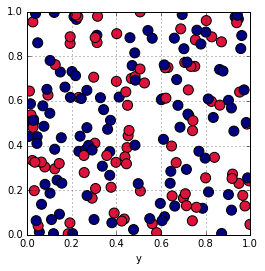

In [ ]:
social_groups = ['democratic', 'republican']
colors_dict = {'democratic' : 'navy', 'republican' : 'crimson'}
N = 200
num_nnbs = 8
num_iters = 50
tolerance_num = 4

all_people = []
for i in range( N ):
    dis_group = np.random.choice( social_groups ) 
    all_people.append( SomePerson( dis_group, np.random.rand(), np.random.rand() ) )
    
plot_city( all_people, colors_dict )

### Run the simulation

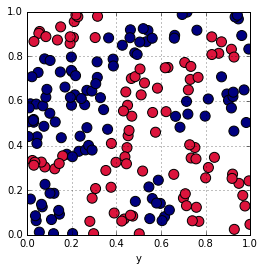

Simulation took:  14.815587997436523  seconds.


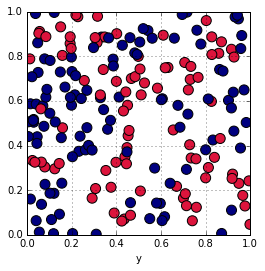

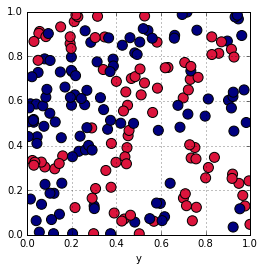

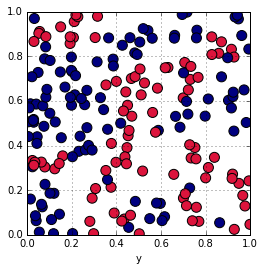

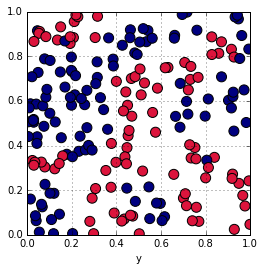

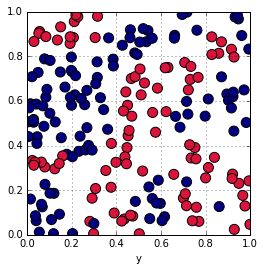

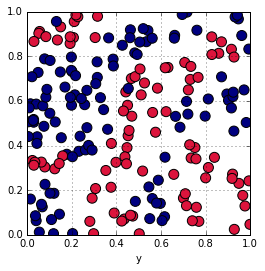

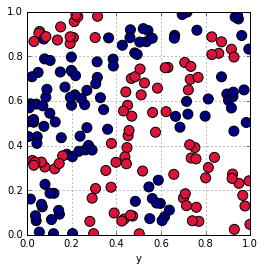

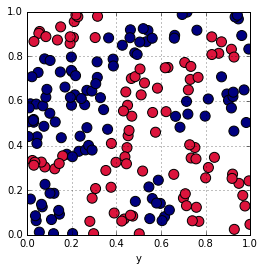

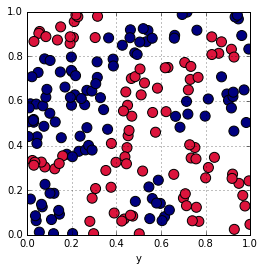

In [ ]:
all_people_end, avg_happy = run_schelling_simulation( num_iters, all_people, num_nnbs, tolerance_num, colors_dict, True )

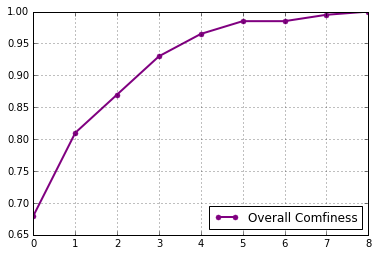

In [ ]:
plot_historic_happiness( avg_happy )

### Average multiple simulations

As this is an stochastic process, multiple runs have to be averaged in order to get a general trend.

Simulation took:  3.2862069606781006  seconds.
Simulation took:  3.4589180946350098  seconds.
Simulation took:  3.515390157699585  seconds.
Simulation took:  2.863820791244507  seconds.
Simulation took:  3.8693978786468506  seconds.
Simulation took:  3.3775620460510254  seconds.
Simulation took:  3.1938185691833496  seconds.
Simulation took:  3.1056954860687256  seconds.
Simulation took:  1.6705734729766846  seconds.
Simulation took:  3.5345675945281982  seconds.


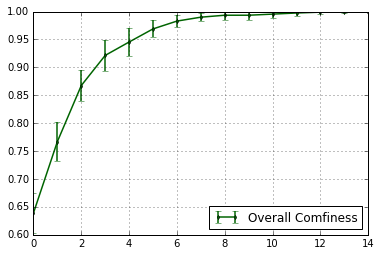

In [ ]:
social_groups = ['democratic', 'republican']
colors_dict = {'democratic' : 'crimson', 'republican' : 'navy'}
N = 200
num_nnbs = 8
num_iters = 50
tolerance_num = 4
num_simulations = 10 # Number of independent simulations to average


all_results = []

for each_sim in range( num_simulations ):
    all_people = []
    
    for i in range( N ):
        dis_group = np.random.choice( social_groups ) 
        all_people.append( SomePerson( dis_group, np.random.rand(), np.random.rand() ) )
        
    all_people_end, avg_happy_dis = run_schelling_simulation( num_iters, all_people,
                                            num_nnbs, tolerance_num, colors_dict, False )
    all_results.append( avg_happy_dis )

plot_errorbars( all_results )

### Evaluate different parameters

How does the overall happiness trend change, for instance, when the tolerance value is modified?

Simulation took:  0.5759778022766113  seconds.
Simulation took:  0.8079013824462891  seconds.
Simulation took:  0.8151087760925293  seconds.
Simulation took:  0.29432153701782227  seconds.
Simulation took:  0.3002970218658447  seconds.
Simulation took:  1.7358276844024658  seconds.
Simulation took:  0.4463963508605957  seconds.
Simulation took:  0.8847658634185791  seconds.
Simulation took:  0.2686879634857178  seconds.
Simulation took:  0.27489233016967773  seconds.
Simulation took:  2.0527467727661133  seconds.
Simulation took:  1.4344792366027832  seconds.
Simulation took:  1.8908100128173828  seconds.
Simulation took:  4.444827079772949  seconds.
Simulation took:  0.96647047996521  seconds.
Simulation took:  0.8683271408081055  seconds.
Simulation took:  1.4257738590240479  seconds.
Simulation took:  0.860405683517456  seconds.
Simulation took:  2.6150169372558594  seconds.
Simulation took:  1.1904735565185547  seconds.
Simulation took:  5.404266595840454  seconds.
Simulation took:

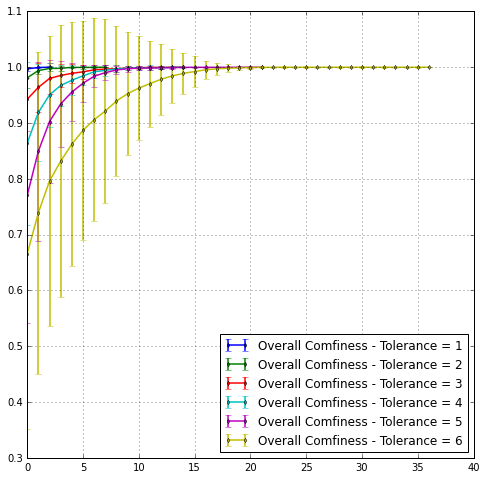

In [ ]:
social_groups = ['democratic', 'republican']
colors_dict = {'democratic' : 'crimson', 'republican' : 'navy'}
N = 200
num_nnbs = 8
num_iters = 50
#tolerance_num = 4
num_simulations = 10 # Number of independent simulations to average


all_results = []

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
for tolerance_num in np.arange( 1, num_nnbs-1 ):

    for each_sim in range( num_simulations ):
        all_people = []

        for i in range( N ):
            dis_group = np.random.choice( social_groups ) 
            all_people.append( SomePerson( dis_group, np.random.rand(), np.random.rand() ) )

        all_people_end, avg_happy_dis = run_schelling_simulation( num_iters, all_people,
                                                num_nnbs, tolerance_num, colors_dict, False )
        all_results.append( avg_happy_dis )


    plot_errorbars_multiparam( ax, all_results, tolerance_num, 'Tolerance' )
plt.grid()
plt.legend( loc  = 4)
